In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

import os, sys
import spikeextractors as se

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
dataset_directory = '/home/alessio/Documents/Codes/MEArec/data/recordings/recordings_20cells_Neuronexus-32_10.0_10.0uV_19-01-2019:17:57.h5' # folder or hdf5 file

rext = se.MEArecRecordingExtractor(recording_path=dataset_directory)

sext = se.MEArecSortingExtractor(recording_path=dataset_directory)

In [3]:
print("Number of recording channels: %d" %rext.getNumChannels())
print("Number of frames recorded: %d" %rext.getNumFrames())
print("Sampling frequency: %f" %rext.getSamplingFrequency())
print("Location channel 0:", rext.getChannelProperty(0, 'location'))
print("Number of units = "+str(len(sext.getUnitIds())))

Number of recording channels: 32
Number of frames recorded: 320000
Sampling frequency: 32000.000000
Location channel 0: [   0.      -18.     -117.1875]
Number of units = 20


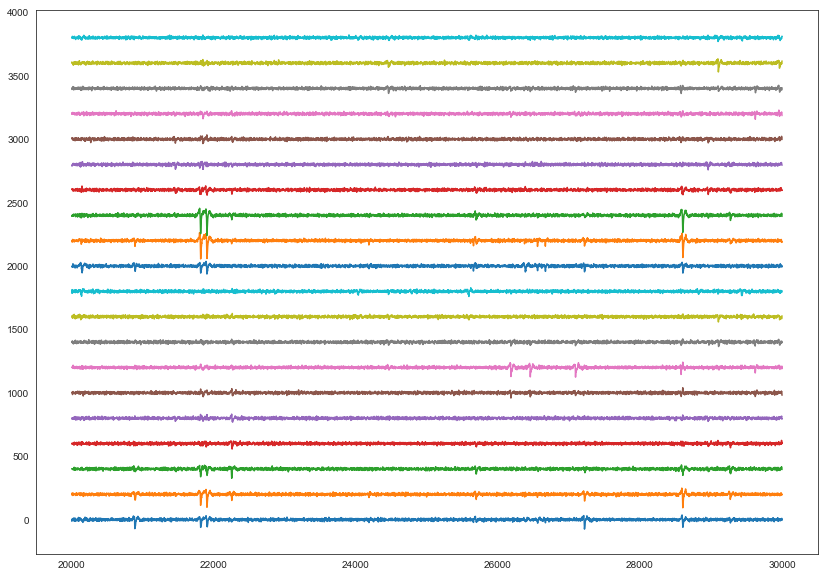

In [5]:
t0,t1 = 20000,30000
raw = rext.getTraces(start_frame=t0,end_frame=t1,channel_ids=range(20))
plt.figure(figsize=(14,0.5*raw.shape[0]))
for i in range(raw.shape[0]):
    plt.plot(np.arange(t0,t1),raw[i]+i*200)

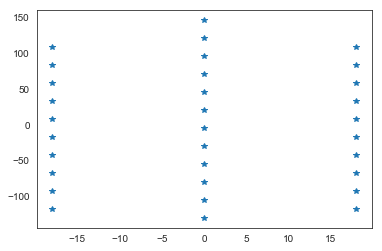

In [7]:
electrode_locations = np.array([rext.getChannelProperty(id, 'location') for id in rext.getChannelIds()])
electrode_locations.shape
plt.plot(electrode_locations[:,1], electrode_locations[:,2], '*')